Import all libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utilities import calc_high_season, calc_min_diff

Load dataset

In [ ]:
df = pd.read_csv('dataset_SCL.csv')
df.shape

Check if the dataset has any missing values. In this case, there is one record where Vlo-O is missing. Its the operation flight number and may not have any significane to flight delay prediction. Hence not dropping or imputing that missing value.

In [ ]:
df.isna().sum()

Convert Fecha-I and Fecha-O to datetime in pandas for ease of use later.

In [ ]:
df['Fecha-I'] = df['Fecha-I'].astype('datetime64')
df['Fecha-O'] = df['Fecha-O'].astype('datetime64')

# Question 1 - Summarized answers

(Detailed EDA below)

Data distribution:

a. Data with actual delays (> 0 minutes) constitute roughly two-third.

b. Date range spans entire year of 2017 with good representation from all months and days of week. This means the dataset contains data from all seasons.

c. Group Latam flights form the majority of flights from Santiago

d. International and national flights are also fairly evenly represented. National flights are little bit more, but that makes sense as in reality most airports will have more domestic traffic than international. 

Insights:

a. Buenos Aires is the most freuent destination overall from SCEL while Antofagasta is the favourite for Group Latam flights.

b. Percentage of data where operating airline code is different from scheduled airline code is 27.37 %. The most common is 'LAN' to 'LXP'

c. Destination city change - El Tepual airport was changed to Araucanía Airport (Temuco) 5 times in 2017. Balmaceda airport changed to El Teplual 4 times in 2017.

d. When there has been a delay, the average delay time for 2017 at SCEL is approx 15 minutes and for group latam is 13.6 minutes. Of all the delays, two-thirds caused by Group Latam flights. This might also be due to the fact that group LATAM operated nearly 60% of the flights from SCEL in 2017.

Take-aways:

a. Group LATAM operates majority of flights from SCEL and hence higher proportion of delays are due to Group LATAM. 

b. Airport is busy on all days of week with no significant preference to a particular day of week especially international flights.

c. Average no of flights per day during high season is 191.6. This is not so different from average no of flights during other parts of the year which is 184.7. So high season may not be that high after all.

d. Destination city change happens pretty rarely. May have happened because of unavoidable reasons.

e. Average delay, when there is a delay, is around 15 minutes, but median is only 8 minutes. Since there are outliers like 161 minute delays, average may be skewed. It would be useful to look at median and a value of 8 minutes could be considered acceptable for any airport. 

f. Group LATAM's median delay is also 8 minutes and having operated more flights than anyone else, the median delay is lower compared to many other airlines. Latam flights have done a decent job sticking to schedule as much as possible.

## EDA

# Origin city
Checking if there are other origin airports apart from SCEL. Looks like the dataset only contains data with SCEL as origin. 

In [339]:
print('Unique values present in Ori-I {}'.format(df['Ori-I'].unique()))
print('Unique values present in Ori-O {}'.format(df['Ori-O'].unique()))

Unique values present in Ori-I ['SCEL']
Unique values present in Ori-O ['SCEL']


# Dataset range

The range of the dataset is important info. It determines how much of an year was covered in the dataset and would have an influence on any inference made from the dataset. Since this is airlines data, it is important to have data from all seasons or months of an year. The dataset given contains data for a whole year (2017)

Range of dataset is from 2017-01-01 to 2018-01-01

Table below shows the count of data available for each month in 2017. All months are approx well represented in the dataset



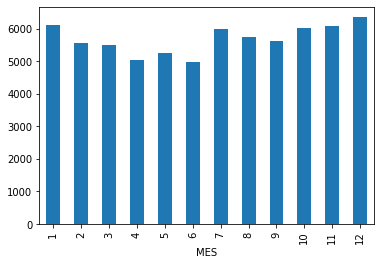

In [340]:
print('Range of dataset is from {} to {}\n'.format(str(df['Fecha-O'].min().date()),str(df['Fecha-O'].max().date())))
print('Table below shows the count of data available for each month in 2017. \
All months are approx well represented in the dataset\n')
df.groupby(['MES']).size().plot.bar()

# Emp-I & Emp-O

Plot the distribution of flights departing from SCEL. Latam airlines forms the majority followed by Sky airlines

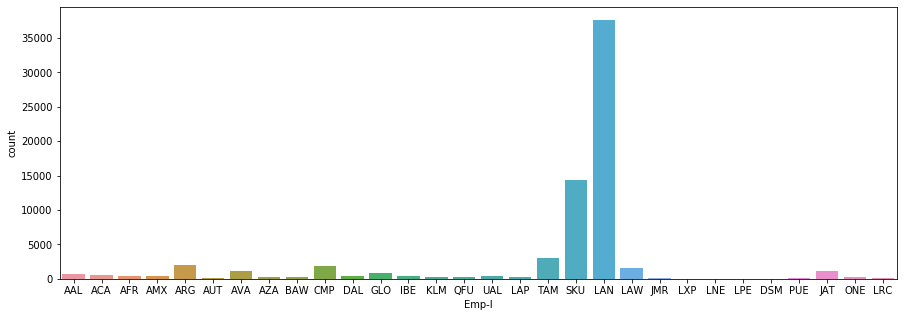

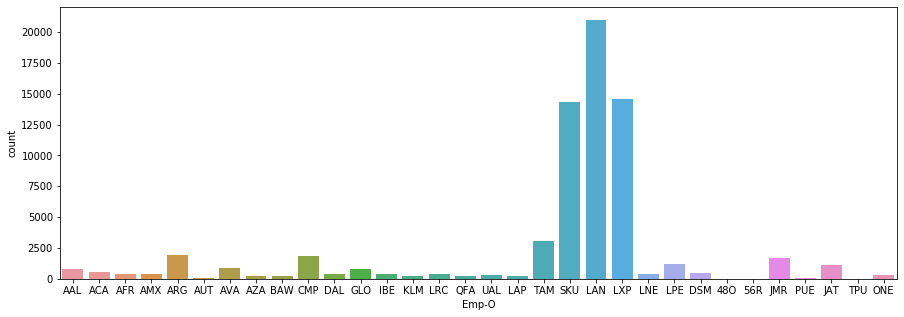

In [341]:
airline_cols = ['Emp-I','Emp-O']
for col in airline_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(x=col,data=df)
    plt.show()

Proportion of flights operated by group Latam - nearly 60%

In [342]:
print('Proportion of flights operated by group Latam: {}'.format(round((df[df['OPERA']=='Grupo LATAM'].shape[0]/df.shape[0])*100,2)))

Proportion of flights operated by group Latam: 59.95


Check if scheduled airline and operating airline are always same. Approx 27% of the time, scheduled and operating airline code differ. 'LAN' to 'LXP' is most common accounting for more than half the change. Both are group Latam. 

In [343]:
df_changed = df[df['Emp-I']!=df['Emp-O']]
print('Percentage of data where operating airline code is different \
from scheduled airline code: {} %\n'.format(round((df_changed.shape[0]/df.shape[0])*100,2)))
print('Table below shows the no of times a particular airline code was changed to another while operating\n')
df_changed.groupby(['Emp-I','Emp-O']).size().reset_index(name='counts').sort_values('counts',ascending=False)

Percentage of data where operating airline code is different from scheduled airline code: 27.37 %

Table below shows the no of times a particular airline code was changed to another while operating



,Emp-I,Emp-O,counts
7,LAN,LXP,14549
10,LAW,JMR,1547
6,LAN,LPE,1210
4,LAN,DSM,491
5,LAN,LNE,373
2,AVA,LRC,265
11,QFU,QFA,195
9,LAW,56R,17
8,LAW,48O,10
0,ARG,AUT,5


# TIPOVUELO
Plot the distribution of International and National flights. National flights are slightly more than international flights but not highly imbalanced.

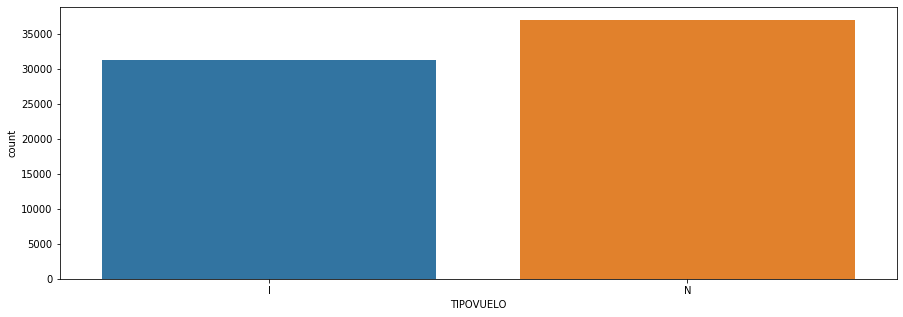

In [344]:
plt.figure(figsize=(15,5))
sns.countplot(x='TIPOVUELO',data=df)
plt.show()

# SIGLADES
Top destinations from Santiago. Buenos Aires is the most common accounting for 9.29%. While Antofagasta,Chile is the most frequent destination for Group Latam in 2017 from Santiago.

In [345]:
print('Top 5 destinations overall\n')
print(df['SIGLADES'].value_counts(normalize=True).mul(100).round(2).head(5))
print('\nTop 5 destinations for group LATAM\n')
print(df[df['OPERA']=='Grupo LATAM']['SIGLADES'].value_counts(normalize=True).mul(100).round(2).head(5))

Top 5 destinations overall

Buenos Aires    9.29
Antofagasta     8.48
Lima            7.73
Calama          7.54
Puerto Montt    6.39
Name: SIGLADES, dtype: float64

Top 5 destinations for group LATAM

Antofagasta     9.61
Calama          8.22
Lima            7.80
Buenos Aires    7.15
Puerto Montt    6.80
Name: SIGLADES, dtype: float64


# DIANOM
Overall distribution of day of week is pretty even with flights operating on almost everyday with Saturday being the lowest at 12% and Friday being the highest at 15%. International flights depart on all days of week approx the same but national flights depart less on Saturdays compared to other days of week (10.44%)

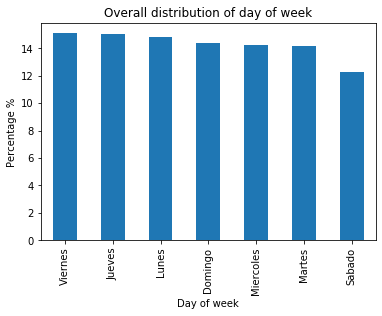

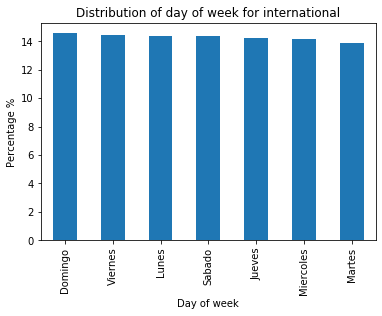

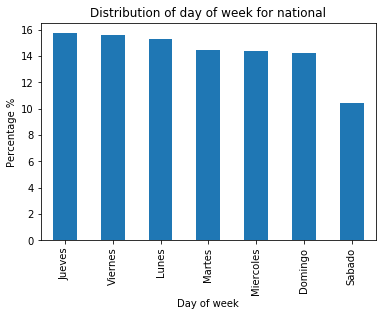

In [346]:
#print('Overall distribution of day of week\n')
day_week_overall = df['DIANOM'].value_counts(normalize=True).mul(100).round(2)
day_week_overall.plot.bar()
plt.title('Overall distribution of day of week')
plt.xlabel('Day of week')
plt.ylabel('Percentage %')
plt.show()

day_week_intnl = df[df['TIPOVUELO']=='I']['DIANOM'].value_counts(normalize=True).mul(100).round(2)
day_week_intnl.plot.bar()
plt.title('Distribution of day of week for international')
plt.xlabel('Day of week')
plt.ylabel('Percentage %')
plt.show()

day_week_ntnl = df[df['TIPOVUELO']=='N']['DIANOM'].value_counts(normalize=True).mul(100).round(2)
day_week_ntnl.plot.bar()
plt.title('Distribution of day of week for national')
plt.xlabel('Day of week')
plt.ylabel('Percentage %')
plt.show()

# Des-I & Des-O
Looking at whether destination airport were changed, the no of times this happened is very small (less than 0.1%). El Tepual airport was changed to Araucanía Airport (Temuco) 5 times in 2017.

In [347]:
df_changed = df[df['Des-I']!=df['Des-O']]
print('Percentage of data where scheduled destination code is different \
from operating destination code: {} %\n'.format(round((df_changed.shape[0]/df.shape[0])*100,2)))
print('Table below shows the no of times a particular destination airport was changed to another while operating\n')
df_changed.groupby(['Des-I','Des-O']).size().reset_index(name='counts').sort_values('counts',ascending=False)

Percentage of data where scheduled destination code is different from operating destination code: 0.04 %

Table below shows the no of times a particular destination airport was changed to another while operating



,Des-I,Des-O,counts
12,SCTE,SCQP,5
2,SABE,SAEZ,4
6,SCBA,SCTE,4
3,SAEZ,SABE,3
0,KIAH,KIAD,1
1,KJFK,KMIA,1
4,SARI,SBFI,1
5,SBGR,SBGL,1
7,SCCI,SCTE,1
8,SCFA,SCCF,1


# Delay in minutes
Calculate difference between scheduled and operating departure times. Approx one-third of the time the flights depart on time or even early. When there has been a delay, the average delay time for 2017 at SCEL is approx 15 minutes and for group latam is 13.6 minutes. Of all the delays, two-thirds caused by Group Latam flights.

In [348]:
df = calc_min_diff(df)
print('Proportion of no delays: {} %'.format(round((df[df['min_diff']<=0].shape[0]/df.shape[0])*100,2)))
print('Proportion of delays: {} %'.format(round((df[df['min_diff']>0].shape[0]/df.shape[0])*100,2)))

Proportion of no delays: 33.28 %
Proportion of delays: 66.72 %


Following figure shows the distribution of delay times

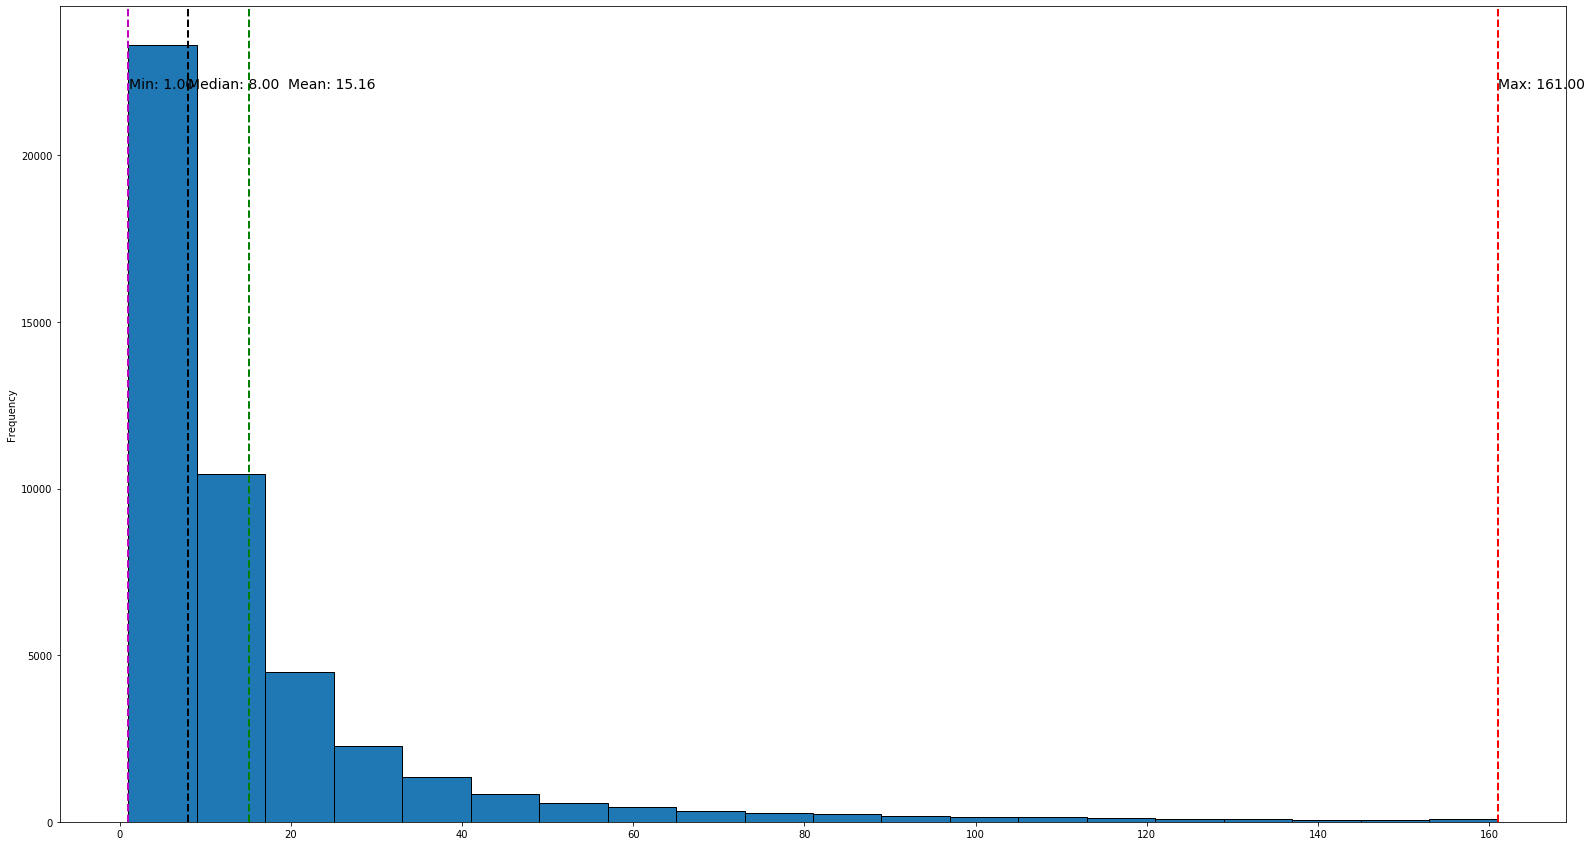

In [349]:
df_delay = df[df['min_diff']>0].reset_index(drop=True)
plt.figure(figsize=(27,15))
df_delay['min_diff'].plot.hist(stacked=True, bins=20,edgecolor='k')
plt.axvline(df_delay['min_diff'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_delay['min_diff'].max(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df_delay['min_diff'].min(), color='m', linestyle='dashed', linewidth=2)
plt.axvline(df_delay['min_diff'].median(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(df_delay['min_diff'].mean()*1.3, max_ylim*0.9, 'Mean: {:.2f}'.format(df_delay['min_diff'].mean()),fontsize=14)
plt.text(df_delay['min_diff'].min()*1.1, max_ylim*0.9, 'Min: {:.2f}'.format(df_delay['min_diff'].min()),fontsize=14)
plt.text(df_delay['min_diff'].max()*1, max_ylim*0.9, 'Max: {:.2f}'.format(df_delay['min_diff'].max()),fontsize=14)
plt.text(df_delay['min_diff'].median()*1, max_ylim*0.9, 'Median: {:.2f}'.format(df_delay['min_diff'].median()),fontsize=14)

plt.show()

Proportion of delays by LATAM: 66.21 %


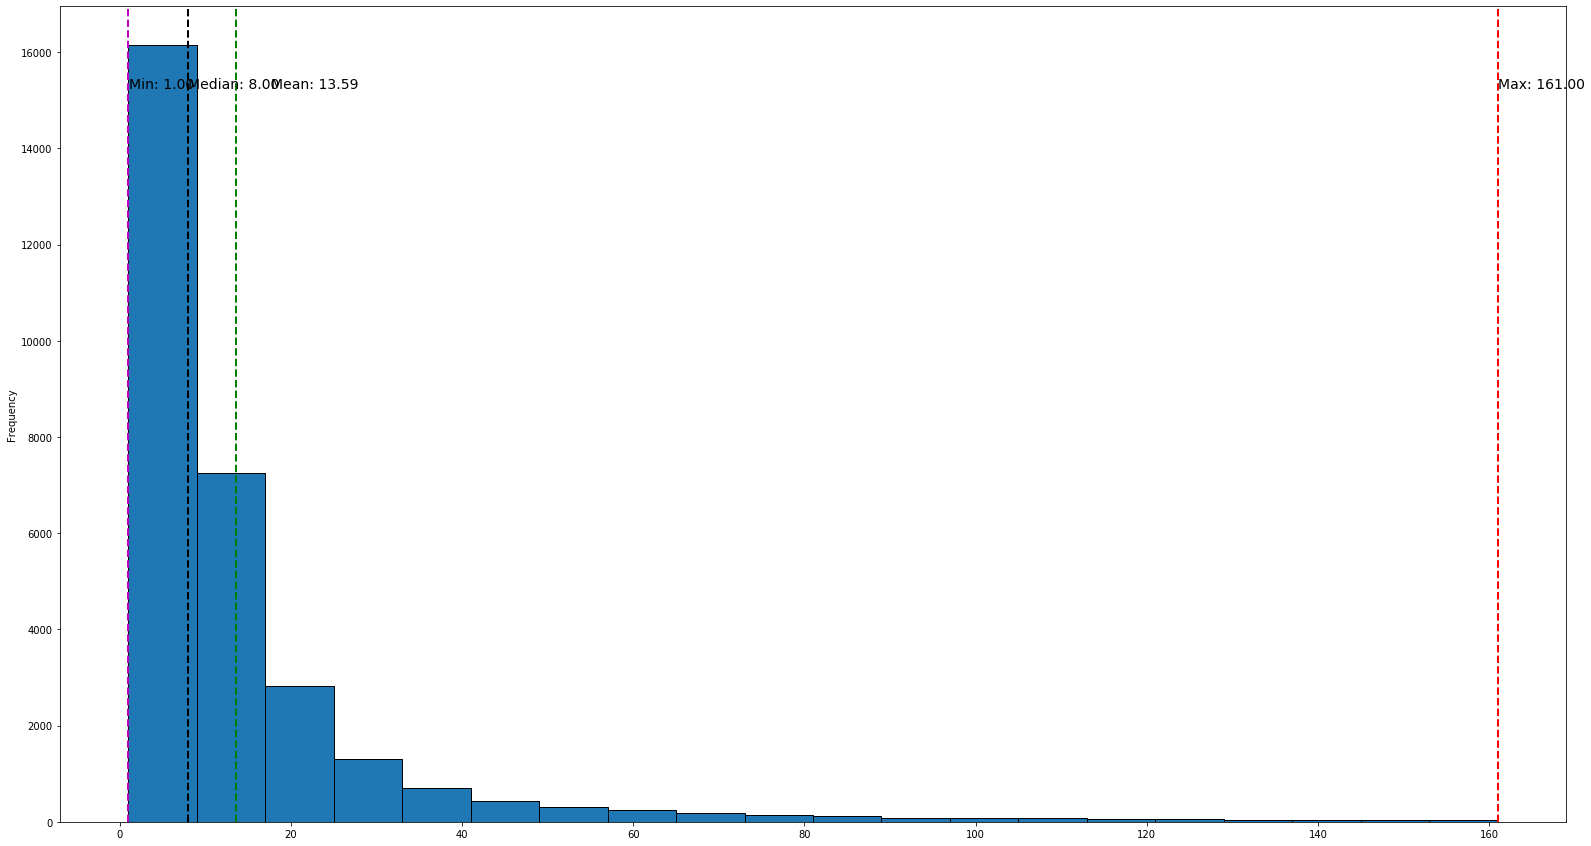

In [350]:
df_delay_latam = df[(df['min_diff']>0) & (df['OPERA']=='Grupo LATAM')].reset_index(drop=True)
print('Proportion of delays by LATAM: {} %'.format(round((df_delay_latam.shape[0]/df_delay.shape[0])*100,2)))
plt.figure(figsize=(27,15))
df_delay_latam['min_diff'].plot.hist(stacked=True, bins=20,edgecolor='k')
plt.axvline(df_delay_latam['min_diff'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_delay_latam['min_diff'].max(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df_delay_latam['min_diff'].min(), color='m', linestyle='dashed', linewidth=2)
plt.axvline(df_delay_latam['min_diff'].median(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(df_delay_latam['min_diff'].mean()*1.3, max_ylim*0.9, 'Mean: {:.2f}'.format(df_delay_latam['min_diff'].mean()),fontsize=14)
plt.text(df_delay_latam['min_diff'].min()*1.1, max_ylim*0.9, 'Min: {:.2f}'.format(df_delay_latam['min_diff'].min()),fontsize=14)
plt.text(df_delay_latam['min_diff'].max()*1, max_ylim*0.9, 'Max: {:.2f}'.format(df_delay_latam['min_diff'].max()),fontsize=14)
plt.text(df_delay_latam['min_diff'].median()*1, max_ylim*0.9, 'Median: {:.2f}'.format(df_delay_latam['min_diff'].median()),fontsize=14)
plt.show()

Following figure shows that Group Latam flights have comparatively better median delay in minutes even though, they have operated more flights than anyone else. 

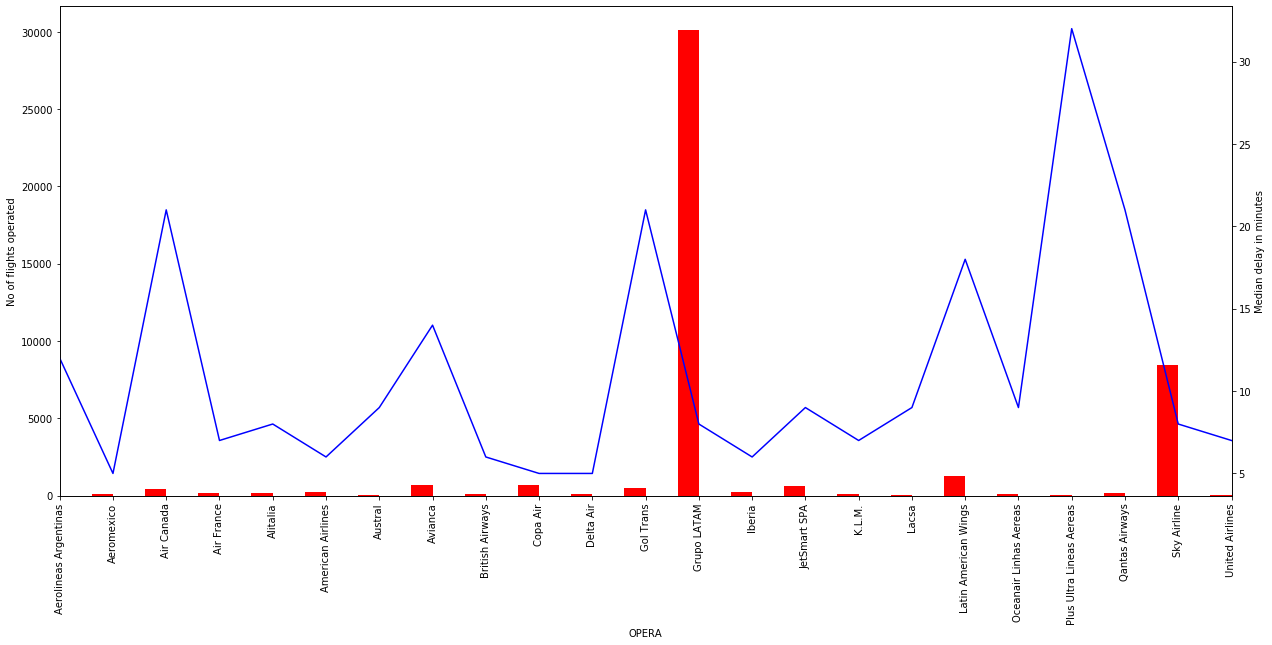

In [351]:
df_delay_airlines = df_delay.groupby(['OPERA'])['min_diff'].agg(['median','count'])

fig = plt.figure(figsize=(21,9)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
df_delay_airlines['count'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_delay_airlines['median'].plot(color='blue', ax=ax2)
ax.set_ylabel('No of flights operated')
ax2.set_ylabel('Median delay in minutes')
plt.show()

# High season

In [352]:
df = calc_high_season(df)
df.high_season.value_counts(normalize=True).mul(100).round(2)

0    67.7
1    32.3
Name: high_season, dtype: float64

High season contains 115 days. So calculating average no of flights per day during high season. It is 191.6 flights per day. This is not so different from average no of flights during other parts of the year which is 184.7. So high season may not be that high after all. 

In [353]:
print('Average no of flights during high season: {}'.format(round((df[df.high_season == 1].shape[0]/115),1)))
print('Average no of flights outside of high season: {}'.format(round((df[df.high_season == 0].shape[0]/250),1)))

Average no of flights during high season: 191.6
Average no of flights outside of high season: 184.7
